In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
import pytry
import pickle
import glob
import pandas as pd
import os

from scipy import stats
import researchpy as rp

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

# LMU GridSearch
Testing values of q and theta using the MLP classifier

Gather data from LMU gridsearch looking at the effect of different values for q and theta on accuracy of the MLP classifier

In [2]:
data_dir = 'F:\\PhD\Studies\\NEN002\\Data\\Gridsearches\\GridSearch_MLP_LMU'
test_param1 = 'q'
test_param2 = 'Theta'
test_param3 = 'Neurons'

In [3]:
lst=[]
for fname in os.listdir(data_dir):
    lst.append(fname)

In [4]:
q=[]
theta=[]
neurons=[]

for i in range(len(lst)):
    q.append(lst[i].split('_')[0])
    theta.append(lst[i].split('_')[1])
    neurons.append(lst[i].split('_')[2])

In [5]:
run=[]
test_target=[]
test_out=[]
accuracy=[]

for folder in os.listdir(data_dir):
    for fname in os.listdir(data_dir+'\\'+folder):
        dat = data_dir+'\\'+folder+'\\'+fname
        if 'test_target' in fname:
            a = np.load(dat, allow_pickle=True) 
            test_target.append(a)
            run.append(fname.split('_')[0])
        elif 'test_out' in fname:
            a = np.load(dat, allow_pickle=True) 
            test_out.append(a)
        elif 'accuracy' in fname:
            a = np.load(dat, allow_pickle=True) 
            accuracy.append(a)

In [6]:
x = pd.DataFrame(columns=['run','test_target','test_out', 'Accuracy'])
for i in range(len(run)):
    x.loc[i]=[run[i], test_target[i], test_out[i], accuracy[i]]

In [7]:
q1=pd.Series(q)
q1=q1.repeat(20)
q1=pd.DataFrame(q1)
q1.columns=[test_param1]
q1=q1.reset_index()

theta1=pd.Series(theta)
theta1=theta1.repeat(20)
theta1=pd.DataFrame(theta1)
theta1.columns=[test_param2]
theta1=theta1.reset_index()

neurons1=pd.Series(neurons)
neurons1=neurons1.repeat(20)
neurons1=pd.DataFrame(neurons1)
neurons1.columns=[test_param3]
neurons1=neurons1.reset_index()

In [8]:
grid_mlp_lmu=x.join(q1)
grid_mlp_lmu=grid_mlp_lmu.join(theta1['Theta'])
grid_mlp_lmu=grid_mlp_lmu.join(neurons1['Neurons'])

order=['50','100','150','200']
grid_mlp_lmu=grid_mlp_lmu.set_index('Neurons').loc[order]
grid_mlp_lmu.reset_index(inplace=True)

# Interaction Plot
Plot the accuracy against values of q and theta.

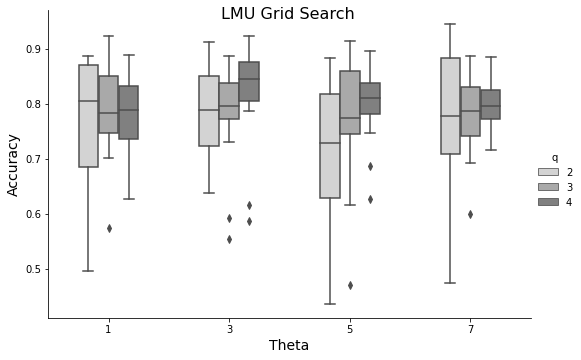

In [9]:
n200=grid_mlp_lmu['Neurons']=='200'
my_pal = {"2": "lightgrey", "3": "darkgrey", "4": "grey"}

sns.catplot(y='Accuracy', x='Theta', hue='q', 
            data=grid_mlp_lmu[n200], 
            width=0.5, 
            order=['1','3','5','7'],
            kind='box', height=5, aspect=1.5,
           palette=my_pal)
plt.suptitle("LMU Grid Search", fontsize=16)
plt.xlabel("Theta", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.savefig('../Figs/mlplmugrid.png')
plt.show()

Best: <br>
    q = 4 <br>
    Theta = 3 <br>

# MLP Neurons GridSearch
Testing number of neurons

Gather data from the MLP gridsearch looking at the effect of different numbers of neurons in the hidden layer on classification accuracy

In [10]:
data_dir = 'F:\\PhD\\Studies\\NEN002\\Data\\Gridsearches\\GridSearch_MLP_Raw'
test_param1 = 'Neurons'

In [11]:
neurons=[]
for fname in os.listdir(data_dir):
    neurons.append(fname)

In [12]:
run=[]
test_target=[]
test_out=[]
accuracy=[]

for folder in os.listdir(data_dir):
    for fname in os.listdir(data_dir+'//'+folder):
        dat = data_dir+'//'+folder+'//'+fname
        if 'test_target' in fname:
            a = np.load(dat, allow_pickle=True) 
            test_target.append(a)
            run.append(fname.split('_')[0])
        elif 'test_out' in fname:
            a = np.load(dat, allow_pickle=True) 
            test_out.append(a)
        elif 'accuracy' in fname:
            a = np.load(dat, allow_pickle=True) 
            accuracy.append(a)

In [13]:
x = pd.DataFrame(columns=['run','test_target','test_out', 'Accuracy'])
for i in range(len(run)):
    x.loc[i]=[run[i], test_target[i], test_out[i], accuracy[i]]

In [14]:
neurons1=pd.Series(neurons)
neurons1=neurons1.repeat(20)
neurons1=pd.DataFrame(neurons1)
neurons1.columns=[test_param1]
neurons1=neurons1.reset_index()

In [15]:
grid_mlp_raw=x.join(neurons1['Neurons'])
order=['50','100','150','200']
grid_mlp_raw=grid_mlp_raw.set_index('Neurons').loc[order]
grid_mlp_raw.reset_index(inplace=True)

# Interaction Plot
Plot the accuracy against number of neurons.

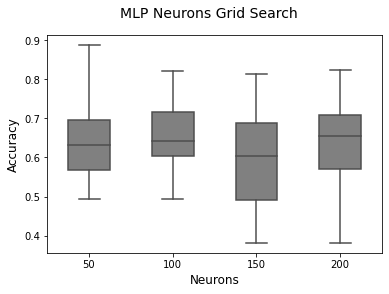

In [16]:
my_pal = {"50": "grey", "100": "grey", "150": "grey", "200":"grey"}
sns.boxplot(y='Accuracy', x='Neurons', 
                 data=grid_mlp_raw, 
                 width=0.5, 
                 palette=my_pal,
                 order=["50", "100", "150", "200"])
plt.suptitle("MLP Neurons Grid Search", fontsize=14)
plt.xlabel("Neurons", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.savefig('../Figs/mlprawgrid.png')
plt.show()

# Nengo DL GridSearch
Testing learning rate

## Data without LMU preprocessing

Gather data from NDL gridsearch looking at the effect of learning rate on accuracy when using the raw data as input.

In [17]:
data_dir = 'F:\\PhD\\Studies\\NEN002\\Data\\Gridsearches\\GridSearch_NDL_Raw'
test_param1 = 'Learning_Rate'

In [18]:
lr=[]
for fname in os.listdir(data_dir):
    lr.append(fname)

In [19]:
run=[]
test_target=[]
test_out=[]

for folder in os.listdir(data_dir):
    for fname in os.listdir(data_dir+'//'+folder):
        dat = data_dir+'//'+folder+'//'+fname
        if 'test_target' in fname:
            a = np.load(dat, allow_pickle=True) 
            test_target.append(a)
            run.append(fname.split('_')[0])
        elif 'test_out' in fname:
            a = np.load(dat, allow_pickle=True) 
            test_out.append(a)

In [20]:
x = pd.DataFrame(columns=['run','test_target','test_out'])
for i in range(len(run)):
    x.loc[i]=[run[i], test_target[i], test_out[i]]

In [21]:
lr1=pd.Series(lr)
lr1=lr1.repeat(20)
lr1=pd.DataFrame(lr1)
lr1.columns=[test_param1]
lr1=lr1.reset_index()

In [22]:
grid_ndl_raw=x.join(lr1['Learning_Rate'])
order=['0.1', '0.001', '1e-05']
grid_ndl_raw=grid_ndl_raw.set_index('Learning_Rate').loc[order]
grid_ndl_raw.reset_index(inplace=True)

In [23]:
for i in range(len(grid_ndl_raw)):
    for j in range(len(grid_ndl_raw['test_out'][i])):
        for k in range(len(grid_ndl_raw['test_out'][i][j])):
            if np.argmin(grid_ndl_raw['test_out'][i][j][k])==1:
                grid_ndl_raw['test_out'][i][j][k]=[1,0]
            else:
                grid_ndl_raw['test_out'][i][j][k]=[0,1]

In [24]:
accuracy=[]
for i in range(len(grid_ndl_raw)):
    a=np.sum(np.vstack(grid_ndl_raw['test_target'][i])==np.vstack(grid_ndl_raw['test_out'][i]))/2
    b=len(np.vstack(grid_ndl_raw['test_target'][i]))
    accuracy.append(a/b)

In [25]:
accuracy=pd.DataFrame(accuracy)
accuracy.columns=['Accuracy']
grid_ndl_raw=grid_ndl_raw.join(accuracy['Accuracy'])

## Data with LMU preprocessing

Gather data from NDL gridsearch looking at the effect of learning rate on accuracy when using the LMU preprocessed data as input.

In [26]:
data_dir = 'F:\\PhD\\Studies\\NEN002\\Data\\Gridsearches\\GridSearch_NDL_LMU'
test_param1 = 'Learning_Rate'

In [27]:
lr=[]
for fname in os.listdir(data_dir):
    lr.append(fname)

In [28]:
run=[]
test_target=[]
test_out=[]

for folder in os.listdir(data_dir):
    for fname in os.listdir(data_dir+'//'+folder):
        dat = data_dir+'//'+folder+'//'+fname
        if 'test_target' in fname:
            a = np.load(dat, allow_pickle=True) 
            test_target.append(a)
            run.append(fname.split('_')[0])
        elif 'test_out' in fname:
            a = np.load(dat, allow_pickle=True) 
            test_out.append(a)

In [29]:
x = pd.DataFrame(columns=['run','test_target','test_out'])
for i in range(len(run)):
    x.loc[i]=[run[i], test_target[i], test_out[i]]

In [30]:
x = pd.DataFrame(columns=['run','test_target','test_out'])
for i in range(len(run)):
    x.loc[i]=[run[i], test_target[i], test_out[i]]

In [31]:
lr1=pd.Series(lr)
lr1=lr1.repeat(20)
lr1=pd.DataFrame(lr1)
lr1.columns=['Learning_Rate']
lr1=lr1.reset_index()

In [32]:
grid_ndl_lmu=x.join(lr1['Learning_Rate'])
order=['0.1', '0.001', '1e-05']
grid_ndl_lmu=grid_ndl_lmu.set_index('Learning_Rate').loc[order]
grid_ndl_lmu.reset_index(inplace=True)

In [33]:
for i in range(len(grid_ndl_lmu)):
    for j in range(len(grid_ndl_lmu['test_out'][i])):
        for k in range(len(grid_ndl_lmu['test_out'][i][j])):
            if np.argmin(grid_ndl_lmu['test_out'][i][j][k])==1:
                grid_ndl_lmu['test_out'][i][j][k]=[1,0]
            else:
                grid_ndl_lmu['test_out'][i][j][k]=[0,1]

In [34]:
accuracy=[]
for i in range(len(grid_ndl_lmu)):
    a=np.sum(np.vstack(grid_ndl_lmu['test_target'][i])==np.vstack(grid_ndl_lmu['test_out'][i]))/2
    b=len(np.vstack(grid_ndl_lmu['test_target'][i]))
    accuracy.append(a/b)

In [35]:
accuracy=pd.DataFrame(accuracy)
accuracy.columns=['Accuracy']
grid_ndl_lmu=grid_ndl_lmu.join(accuracy['Accuracy'])

# Interaction Plots

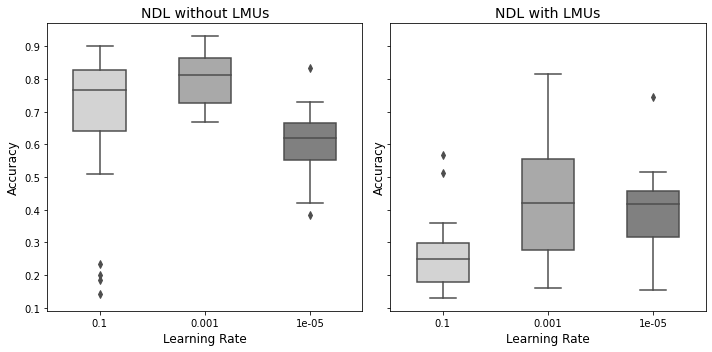

In [36]:
my_pal = {"0.1": "lightgrey", "0.001": "darkgrey", "1e-05": "grey"}
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10, 5))

sns.boxplot(y='Accuracy', x='Learning_Rate', 
                 data=grid_ndl_raw, 
                 width=0.5, 
                 palette=my_pal,
                 order=['0.1', '0.001', '1e-05'], ax=ax1)
ax1.set_title("NDL without LMUs", fontsize=14)
ax1.set_xlabel("Learning Rate", fontsize=12)
ax1.set_ylabel("Accuracy", fontsize=12)

sns.boxplot(y='Accuracy', x='Learning_Rate', 
                 data=grid_ndl_lmu, 
                 width=0.5, 
                 palette=my_pal,
                 order=['0.1', '0.001', '1e-05'], ax=ax2)
ax2.set_title("NDL with LMUs", fontsize=14)
ax2.set_xlabel("Learning Rate", fontsize=12)
ax2.set_ylabel("Accuracy", fontsize=12)

plt.close(2)
plt.close(3)
plt.tight_layout()
fig.savefig('../Figs/ndlgrid.png')